## Análise Idade Alunos Matriculados ##

**Objetivo:** Compreender a idade média dos alunos que estao matriculados no CRM da escola

**Período dos Contratos**: 2014 a 2023

**Tamanho da Amostra** = 15.804

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# define o tamanho das figuras 
plt.rcParams["figure.figsize"] = (15,5) 

In [3]:
df = pd.read_csv('data_age.csv')

In [4]:
df.head()

,student_id,birthdate,course_type
0,0,1994-10-15 00:00:00.000,a
1,1,1990-08-22 00:00:00.000,a
2,2,1997-10-07 00:00:00.000,a
3,3,1978-08-22 00:00:00.000,a
4,4,1981-08-25 00:00:00.000,a


In [5]:
#tamanho da amostra
df.shape[0]

15804

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15804 entries, 0 to 15803
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   15804 non-null  int64 
 1   birthdate    15804 non-null  object
 2   course_type  15804 non-null  object
dtypes: int64(1), object(2)
memory usage: 370.5+ KB


In [7]:
#trasformando coluna data nascimento em datetime
df['birthdate']=pd.to_datetime(df['birthdate'])

In [8]:
now = pd.Timestamp('now')
df['age']=(now - df['birthdate']).astype('<m8[Y]').astype(int)

In [9]:
#range por idade
df['age'].min(), df['age'].max()

(0, 123)

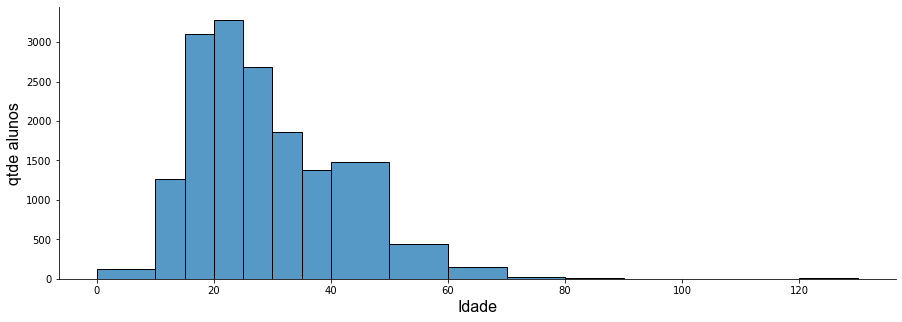

In [10]:
#distribuição por faixa e tária 
sns.histplot(data=df,x='age', bins=[0,10,15,20,25,30,35,40,50,60,70,80,90,100,110,120,130])
#plt.title('Distribuição Idade Amostra', fontfamily='Arial', fontsize=20)
plt.ylabel('qtde alunos',fontsize=16,fontname='Arial')
plt.xlabel('Idade',fontsize=16,fontname='Arial')
sns.despine();

Observamos que os dados possuem recorrencia até +/- 80 anos - iremos observar a descrição da distribuição retirando os que têm idade menor que 10 anos e o que são maior do que 80 anos

In [11]:
#IDADE GERAL
np.round(df.loc[(df['birthdate']>'1942-12-31')&
     (df['age']>=10),'age'].describe())

count    15667.0
mean        27.0
std         11.0
min         10.0
25%         19.0
50%         25.0
75%         33.0
max         80.0
Name: age, dtype: float64

Observamos que a média de idade para esta amostra é de 27 anos, vamos criar um intervalo de confiança para esta medida - Vale salientar porém que  50% dos nossos alunos têm até 25 anos.

Realizaremos um teste de hipótese para saber qual a média que devemos adotar, 25 ou 27. Para isso nossa hipótese nula será que a média de idade dos alunos é de 27 anos. 

In [12]:
t_stat, p_value = stats.ttest_1samp(df['age'], popmean=27)
#como estamos performando um teste unilateral, vamos dividir o p_value por dois
p_value=p_value/2
print(t_stat, p_value)


-0.8422954245213755 0.19981767915306564


Com 95% de confiança, não há indícios para que rejeitemos a hipótese nula

## Intervalo de Confiança ##

as idades acima não fazem sentido para o negócio, por isso limparemos as bases para olharmos a variável idade

In [13]:
#número de observações
n = df.shape[0]
std= df['age'].std()
significancia=0.05
confianca=0.95
z=1.96
mean=df['age'].mean()

### <font color=green>Erro inferencial</font> ###
## $$e = z \frac{\sigma}{\sqrt{n}}$$

In [14]:
e=z*(std/(np.sqrt(n)))
e

0.17521511587380922

In [15]:
mean - e, mean+e

(26.749487491061146, 27.09991772280876)

In [16]:
#Calculando intervalo de confiança
stats.norm.interval(alpha=0.95, loc=mean,scale=e )

(26.581287290275274, 27.268117923594634)

A média varia de 26 a 27 anos para os alunos desta escola.

Nossa hipótese é que a média de idade entre uma experiência e outra seja diferente, para validarmos realizamos um teste estatistico

### Distribuição da Idade Conforme Experiência ### 

In [17]:
age_conn=pd.DataFrame(df.loc[(df['birthdate']>'1942-12-31')&
    (df['age']>=10)&
    (df['course_type']=='b'),'age'])
age_int=pd.DataFrame(df.loc[(df['birthdate']>'1942-12-31')&
    (df['age']>=10)&
    (df['course_type']=='b'),'age'])

In [18]:
df['course_type'].value_counts(normalize=True)

a    0.779486
b    0.220514
Name: course_type, dtype: float64

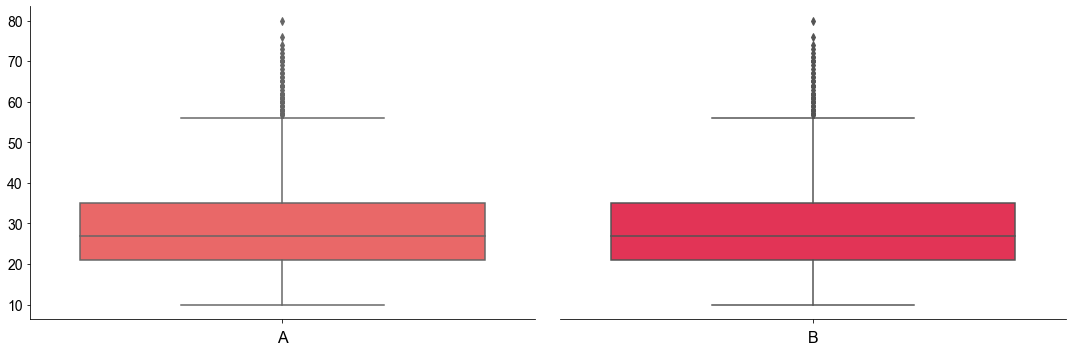

In [19]:
age=(range(10,81))
f, axes = plt.subplots(1,2)
sns.boxplot(data=age_conn,y='age', ax=axes[0],color='#FF5252')
axes[0].set_xlabel('A', fontsize=16,fontfamily='Arial')
axes[0].set_ylabel('', fontsize=14,fontfamily='Arial')
axes[0].set_yticklabels([0,10,20,30,40,50,60,70,80], fontsize=14, fontfamily='Arial')
sns.boxplot(data=age_int,y='age', ax=axes[1], color='#FF1744')
axes[1].set( yticks=[],ylabel=" ")
axes[1].set_xlabel('B', fontsize=16, fontfamily='Arial')

for axes in axes.flat:
    if axes.is_first_col():
        if axes.is_last_row():
            sns.despine(bottom=False, left=False, ax=axes)
        else:
            sns.despine(bottom=True, left=False, ax=axes)
    elif axes.is_last_row():
        sns.despine(bottom=False, left=True, ax=axes)
    else:
        sns.despine(bottom=True, left=True, ax=axes)
#f.suptitle('Distribuição Idade WizardOn por Experiência', fontname='Arial',fontsize='16')
#sns.despine()
f.tight_layout();

In [20]:
#checking if the variance is the same for both sample
df.loc[(df['birthdate']>'1942-12-31')&
    (df['age']>=10)&
    (df['course_type']=='a'),'age'].var() == df.loc[(df['birthdate']>'1942-12-31')&
    (df['age']>=10)&
    (df['course_type']=='b'),'age'].var()

False

In [21]:
"""olhamos aqui se temos variância igual, caso sim não alteramos parâmetro equal_var, caso não alteramos para performar
o WELCH’S T-TEST 
""" 
stat, p = stats.ttest_ind(list(df.loc[(df['birthdate']>'1942-12-31')&
     (df['age']>=10)&
     (df['course_type']=='a'),'age']),
     list(df.loc[(df['birthdate']>'1942-12-31')&
     (df['age']>=10)&
     (df['course_type']=='b'),'age']))

print('stat:',stat, 'pvalue:', p)

stat: -10.331682983081013 pvalue: 6.092304937304288e-25


Não há indícios para que rejeitemos a hipótese nula (H0) (média de idade dos alunos a = b) 

## Visualização por Faixa Etária ##

In [22]:
ate15=df.loc[df['age']<15,'age'].count()
de15a20=df.loc[(df['age']>=15)&(df['age']<20),'age'].count()
de20a25=df.loc[(df['age']>=20)&(df['age']<25),'age'].count()
de25a30=df.loc[(df['age']>=25)&(df['age']<30),'age'].count()
de30a35=df.loc[(df['age']>=30)&(df['age']<35),'age'].count()
de30a35=df.loc[(df['age']>=30)&(df['age']<35),'age'].count()
de35a45=df.loc[(df['age']>=35)&(df['age']<45),'age'].count()
de45a55=df.loc[(df['age']>=45)&(df['age']<55),'age'].count()
de55a65=df.loc[(df['age']>=55)&(df['age']<65),'age'].count()
de65a75=df.loc[(df['age']>=65)&(df['age']<75),'age'].count()
de75a80=df.loc[(df['age']>=75)&(df['age']<80),'age'].count()
df_faixas=pd.DataFrame({'faixas':['até 15','15 a 20','20 a 25','25 a 30','30 a 35',
                                  '35 a 45', '45 a 55', '55 a 65', '65 a 75',
                                 '75 a 80'],
                  'valores':[ate15,de15a20,de20a25,de25a30,de30a35,de35a45, de45a55,
                            de55a65,de65a75,de75a80]})

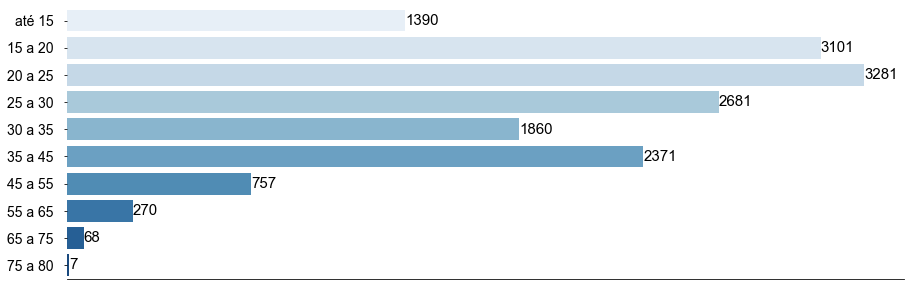

In [23]:
#faixa etária 
plt.rcParams['ytick.major.pad']='10'
sns.color_palette("Paired")
fig=sns.barplot(data=df_faixas, x='valores',y='faixas', palette='Blues')
plt.xlabel(" ")
plt.ylabel('', fontsize=16, fontfamily='Arial')
plt.xticks(ticks=[])
plt.yticks(fontname='Arial',fontsize=14)
plt.bar_label(fig.containers[0], fontsize=15, fontfamily='Arial')
#plt.title('Total de Matrículas por faixa etária WizardON', fontsize=14, fontname='Arial', pad=5)
sns.despine(left=True);